In [1]:
from jyrobot.world import World
from jyrobot import config
from jyrobot.canvas import Canvas
import math

from ipylab import JupyterFrontEnd, Panel
from ipywidgets import Layout

In [2]:
def get_canvas(config, width, height, scale=1.0):
    config["width"] = round(width * scale)
    config["height"] = round(height * scale)

    canvas = Canvas(config["width"], config["height"])
    canvas.gc.scale(scale, scale)
    canvas.gc.layout = Layout(width='%spx' % config["width"])
    return canvas

In [3]:
canvas = get_canvas(config, 500, 250, 1.75)

In [4]:
app = JupyterFrontEnd()

panel = None
for widget in app.shell.widgets.values():
    if hasattr(widget, "title") and widget.title.label == "Jyrobot Simulator":
        #panel = widget
        break
        
if panel is None:
    panel = Panel()
    panel.children = [canvas.gc]
    panel.title.label = "Jyrobot Simulator" 
    app.shell.add(panel, 'main', {'mode': 'split-right'})
else:
    panel.children = [canvas.gc]



In [5]:
world = World(config, canvas)

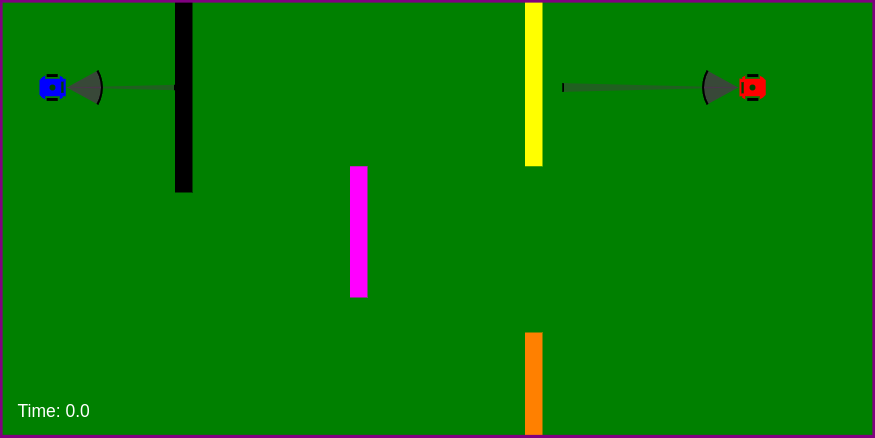

In [6]:
canvas.takePicture()

In [7]:
world.reset()

In [8]:
world.robots[0].vx = 1.0
world.robots[0].va = math.pi/40

In [9]:
world.seconds(10.0)

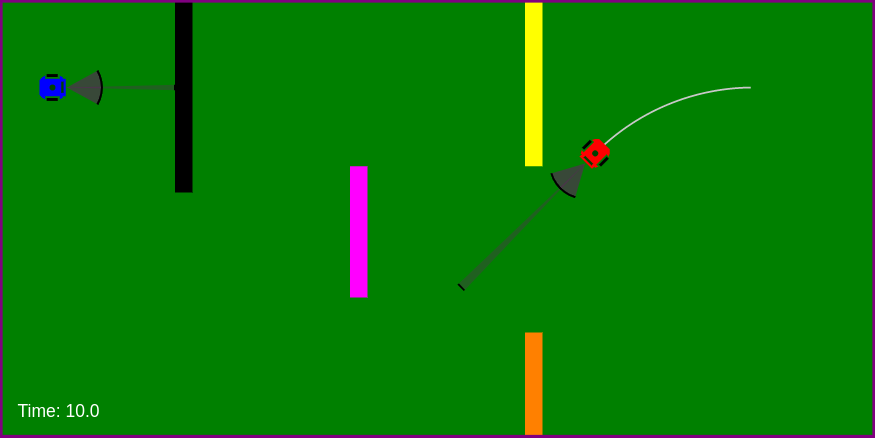

In [10]:
canvas.takePicture()

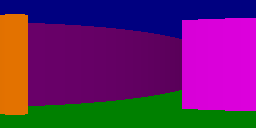

In [11]:
world.robots[0].cameras[0].takePicture()

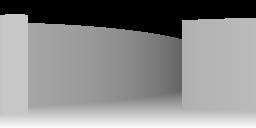

In [12]:
world.robots[0].cameras[0].takePicture("depth")

In [13]:
world.robots[0].cameras[0].set_size(500, 250)
world.robots[0].cameras[0].set_fov(360)

CPU times: user 8 µs, sys: 4 µs, total: 12 µs
Wall time: 27.7 µs


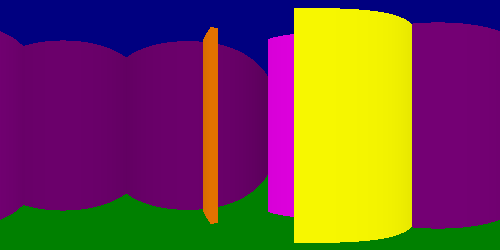

In [14]:
%time
world.robots[0].cameras[0].takePicture()